***Si importano le librerie necessarie***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Si esegue la connessione a Google Drive***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Si esegue il caricamento del dataset***

In [3]:
file_path = '/content/drive/MyDrive/primofile.csv'
df = pd.read_csv(file_path)

***Si stampano le prime e le ultime 5 righe del dataset per verificarne la correttezza***

In [4]:
pd.concat([df.head(), df.tail()])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others
434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others
435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others
436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals
437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut
438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level)


***Si stampano le principali informazioni sui dati e le metriche statistiche riassuntive delle colonne***


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      439 non-null    object
 1   Countries                 439 non-null    object
 2   Local                     439 non-null    object
 3   Industry Sector           439 non-null    object
 4   Accident Level            439 non-null    object
 5   Potential Accident Level  439 non-null    object
 6   Genre                     439 non-null    object
 7   Employee ou Terceiro      439 non-null    object
 8   Risco Critico             439 non-null    object
dtypes: object(9)
memory usage: 31.0+ KB


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
count,439,439,439,439,439,439,439,439,439
unique,287,3,12,3,5,6,2,3,34
top,2016-02-26 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others
freq,13,263,90,241,328,155,417,189,232


***Si stampano le colonne duplicate***

In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                    Data   Countries     Local Industry Sector Accident Level  \
42   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
43   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
44   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
45   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
46   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
47   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
48   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
49   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
50   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
51   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
52   2016-02-26 00:00:00  Country_01  Local_06          Metals              I   
53   2016-02-26 00:00:00  Co

## **CONVERSIONE  DEI TIPI DI "ACCIDENT LEVEL" E "POTENTIAL ACCIDENT LEVEL"**

In [5]:
#Secondo metodo di conversione da numeri romani a numeri arabi
roman_to_arabic = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI': 6
}

d1 = {v: roman_to_arabic[v] for v in df['Accident Level'].unique()}
d2 = {k: roman_to_arabic[k] for k in df['Potential Accident Level'].unique()}

df['Accident Level'] = df['Accident Level'].replace(d1)
df['Potential Accident Level'] = df['Potential Accident Level'].replace(d2)

print(df)

                    Data   Countries     Local Industry Sector  \
0    2016-01-01 00:00:00  Country_01  Local_01          Mining   
1    2016-01-02 00:00:00  Country_02  Local_02          Mining   
2    2016-01-06 00:00:00  Country_01  Local_03          Mining   
3    2016-01-08 00:00:00  Country_01  Local_04          Mining   
4    2016-01-10 00:00:00  Country_01  Local_04          Mining   
..                   ...         ...       ...             ...   
434  2017-07-04 00:00:00  Country_01  Local_04          Mining   
435  2017-07-04 00:00:00  Country_01  Local_03          Mining   
436  2017-07-05 00:00:00  Country_02  Local_09          Metals   
437  2017-07-06 00:00:00  Country_02  Local_05          Metals   
438  2017-07-09 00:00:00  Country_01  Local_04          Mining   

     Accident Level  Potential Accident Level   Genre  Employee ou Terceiro  \
0                 1                         4    Male           Third Party   
1                 1                         4    

<ipython-input-5-a73ed0858f02>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accident Level'] = df['Accident Level'].replace(d1)
<ipython-input-5-a73ed0858f02>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Potential Accident Level'] = df['Potential Accident Level'].replace(d2)


## **METRICHE STATISTICHE PER LA COLONNA DATA**


In [ ]:
# Si vogliono confrontare i primi 7 mesi di ogni anno per verificare se ci sono stati più incidenti da gennaio 2016 fino a luglio 2016 o da gennaio 2017 fino a luglio 2017

# Si converte la colonna delle date in formato datetime
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d %H:%M:%S')

# Si seleziona l'anno di interesse (in questo caso 2016)
anno_specifico = 2016

# Si filtra il DataFrame per l'anno scelto e i primi sette mesi di quell'anno
df_primi_sette_mesi = df[(df['Data'].dt.year == anno_specifico) & (df['Data'].dt.month <= 7)]

# Si contano le occorrenze nei primi sette mesi dell'anno scelto
conteggio_primi_sette_mesi = len(df_primi_sette_mesi)
print(f"Numero di occorrenze nei primi sette mesi del {anno_specifico}: {conteggio_primi_sette_mesi}")


# Ora si esegue lo stesso procedimento per il 2017

# Si seleziona come anno il 2017
anno_specifico = 2017

# in questo caso si può filtrare solo per anno l'anno selezionato senza specificare il numero dei mesi, perchè il dataframe considera solo fino a Luglio 2017
df_anno = df[df['Data'].dt.year == anno_specifico]

# Si contano le occorrenze
conteggio_anno = len(df_anno)
print("Numero di occorrenze nei primi sette mesi del", anno_specifico, ":", conteggio_anno)

Numero di occorrenze nei primi sette mesi del 2016: 196
Numero di occorrenze nei primi sette mesi del 2017 : 140


Data  Data
2016  1       12
      2       43
      3       34
      4       29
      5       26
      6       33
      7       19
      8       21
      9       24
      10      21
      11      13
      12      24
2017  1       28
      2       30
      3       19
      4       23
      5       15
      6       20
      7        5
Name: Data, dtype: int64


<ipython-input-13-ab14b8eb0538>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['mese'] = df_2016['Data'].dt.month


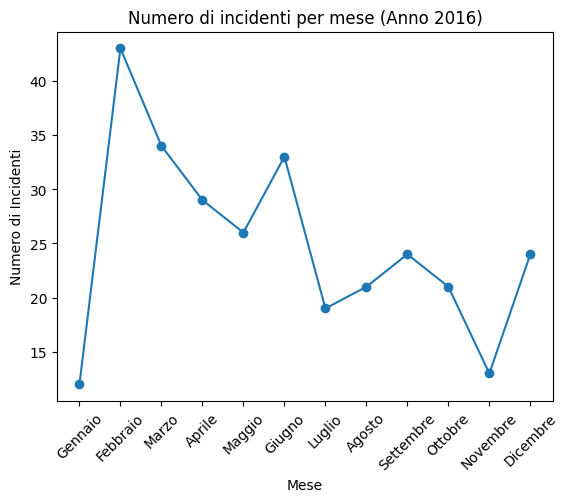

In [ ]:
# Ora si vuole rappresentare graficamente il numero di incidenti per mese, nell'anno 2016

# Si contano le occorrenze di incidenti per ogni mese di entrambi gli anni considerati
conteggi_per_mese_anno = df.groupby([df['Data'].dt.year, df['Data'].dt.month])['Data'].count()
print(conteggi_per_mese_anno)

# Si converte la colonna 'data' in formato datetime
#df['Data'] = pd.to_datetime(df['Data']) !!!!!questo si può commentare (lo abbiamo fatto anche sopra, è una ripetizione)

# Si filtra per l'anno 2016, che è quello di interesse
df_2016 = df[df['Data'].dt.year == 2016]

# Si estrae il mese dalla data
df_2016['mese'] = df_2016['Data'].dt.month

# Quindi si raggruppa per mese e si conta il numero di incidenti per ogni mese
incidenti_per_mese_2016 = df_2016.groupby('mese').size().reset_index(name='incidenti')

# Si ordinano in modo crescente i mesi
incidenti_per_mese_2016 = incidenti_per_mese_2016.sort_values(by='mese')

mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
incidenti_per_mese_2016['mese_nome'] = incidenti_per_mese_2016['mese'].map(lambda x: mesi[x-1])

# Si crea il grafico a linee
plt.plot(incidenti_per_mese_2016['mese_nome'], incidenti_per_mese_2016['incidenti'], marker='o')
plt.xticks(rotation=45)  # Ruoto le etichette di 45 gradi per migliorare la leggibilità
plt.xlabel('Mese')
plt.ylabel('Numero di Incidenti')
plt.title('Numero di incidenti per mese (Anno 2016)')
plt.show()

Data  Data
2016  1       12
      2       43
      3       34
      4       29
      5       26
      6       33
      7       19
      8       21
      9       24
      10      21
      11      13
      12      24
2017  1       28
      2       30
      3       19
      4       23
      5       15
      6       20
      7        5
Name: Data, dtype: int64


<ipython-input-14-4c492ecd62a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['mese'] = df_2017['Data'].dt.month


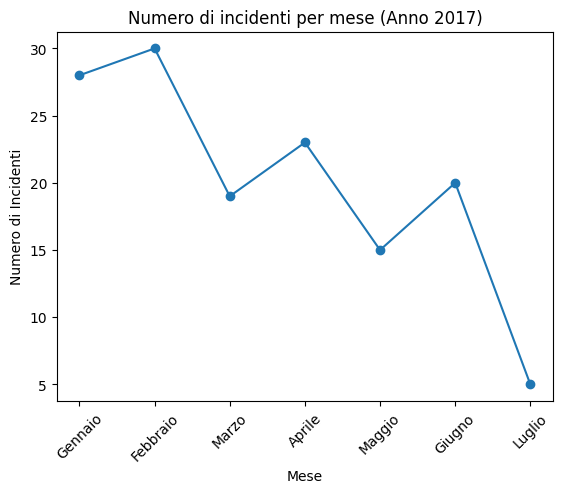

In [ ]:
# Ora si vuole rappresentare graficamente il numero di incidenti per mese, nell'anno 2017
# Ciò permette di vedere la differenza di occorrenze di incidenti mese per mese nei diversi anni, anche graficamente

# Si raggruppa per anno e mese e si contano le occorrenze
conteggi_per_mese_anno = df.groupby([df['Data'].dt.year, df['Data'].dt.month])['Data'].count()
print(conteggi_per_mese_anno)

# Si filtra per l'anno 2017, che è quello selezionato in questo caso
df_2017 = df[df['Data'].dt.year == 2017]

# Si estrae il mese dalla data
df_2017['mese'] = df_2017['Data'].dt.month

# Si raggruppa per mese e si contano il numero di incidenti per ogni mese
incidenti_per_mese_2017 = df_2017.groupby('mese').size().reset_index(name='incidenti')

# Si ordinano in modo crescente i mese
incidenti_per_mese_2017 = incidenti_per_mese_2017.sort_values(by='mese')

mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
incidenti_per_mese_2017['mese_nome'] = incidenti_per_mese_2016['mese'].map(lambda x: mesi[x-1])

# Si crea il grafico a linee
plt.plot(incidenti_per_mese_2017['mese_nome'], incidenti_per_mese_2017['incidenti'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Mese')
plt.ylabel('Numero di Incidenti')
plt.title('Numero di incidenti per mese (Anno 2017)')
plt.show()

## **METRICHE STATISTICHE PER LA COLONNA COUNTRY**

Countries
Country_01    263
Country_02    132
Country_03     44
dtype: int64


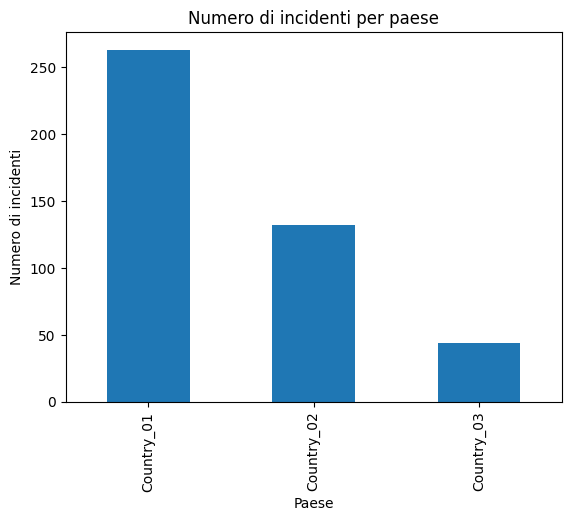

In [ ]:
#Si vuole calcolare la frequenza di incidenti per ogni paese

# Si raggruppano i dati per paese e si contano le occorrenze degli incidenti per ognuno di essi
incidenti_per_paese = df.groupby('Countries').size()
print(incidenti_per_paese)

# Si crea il grafico a barre per rappresentare i valori trovati
incidenti_per_paese.plot(kind='bar')
plt.title('Numero di incidenti per paese')
plt.xlabel('Paese')
plt.ylabel('Numero di incidenti')
plt.show()

Countries
Country_01    1.615970
Country_02    1.416667
Country_03    1.318182
Name: Accident Level, dtype: float64


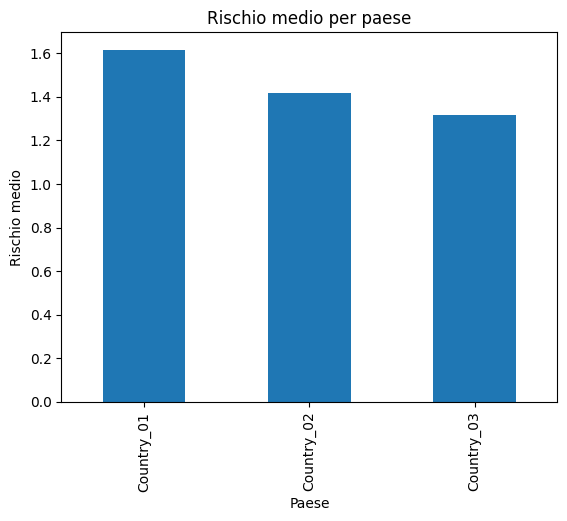

In [ ]:
# Si vuole calcolare la media di rischio per ogni paese
rischio_medio_per_paese = df.groupby('Countries')['Accident Level'].mean()
print(rischio_medio_per_paese)

# Si costruisce un grafico a barre per la visualizzazione dei risultati ottenuti
rischio_medio_per_paese.plot(kind='bar')
plt.title('Rischio medio per paese')
plt.xlabel('Paese')
plt.ylabel('Rischio medio')
plt.show()

Local
Local_01    57
Local_03    90
Local_04    56
Local_06    58
Local_11     2
dtype: int64


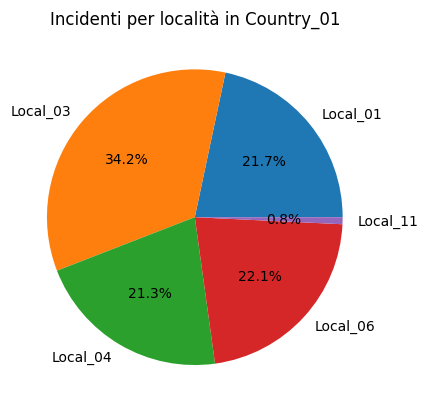

In [ ]:
# Per il Country_01 si vuole vedere la percentuale di incidenti verificati in ogni sua Località

# Si seleziona lo specifico paese di interesse
paese_specifico = "Country_01"
dati_paese = df[df["Countries"] == paese_specifico]

# Si raggruppano i dati di quel paese per località e si contano le occorrenze per essi
incidenti_per_localita = dati_paese.groupby("Local").size()
print(incidenti_per_localita)

# Si crea un grafico a torta per la rappresentazione dei dati trovati
plt.pie(incidenti_per_localita, labels=incidenti_per_localita.index, autopct='%1.1f%%')
plt.title("Incidenti per località in Country_01")
plt.show()

Local
Local_02    24
Local_05    59
Local_07    14
Local_08    29
Local_09     2
Local_12     4
dtype: int64


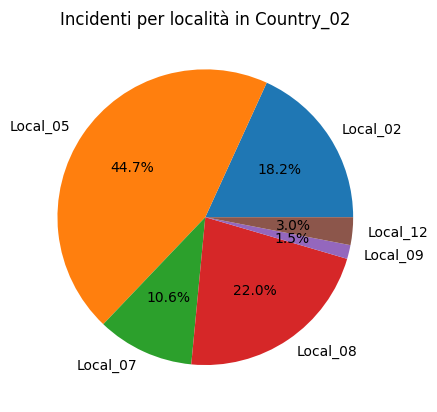

In [ ]:
# Si esegue lo stesso procedimento per il Country_02

# Si seleziona lo specifico paese di interesse
paese_specifico = "Country_02"
dati_paese = df[df["Countries"] == paese_specifico]

# Si raggruppano i dati di quel paese per località e si contano le occorrenze di incidenti per essi
incidenti_per_localita = dati_paese.groupby("Local").size()
print(incidenti_per_localita)

# Si crea un grafico a torta per la rappresentazione dei dati trovati
plt.pie(incidenti_per_localita, labels=incidenti_per_localita.index, autopct='%1.1f%%')
plt.title("Incidenti per località in Country_02")
plt.show()

Local
Local_10    44
dtype: int64


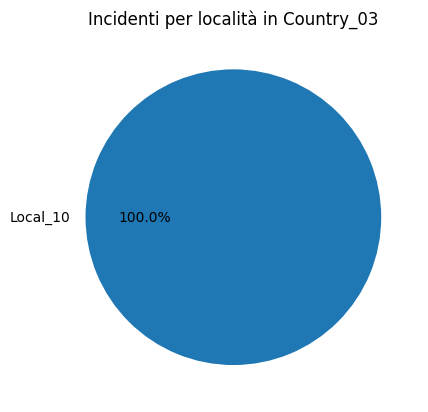

In [ ]:
# Si esegue lo stesso procedimento per il Country_03

# Si seleziona lo specifico paese di interesse
paese_specifico = "Country_03"
dati_paese = df[df["Countries"] == paese_specifico]

# Si raggruppano i dati di quel paese per località e si contano gli incidenti per essi
incidenti_per_localita = dati_paese.groupby("Local").size()
print(incidenti_per_localita)

# Si crea un grafico a torta per la rappresentazione dei dati trovati
plt.pie(incidenti_per_localita, labels=incidenti_per_localita.index, autopct='%1.1f%%')
plt.title("Incidenti per località in Country_03")
plt.show()

## **METRICHE STATISTICHE PER LA COLONNA LOCAL**

Local
Local_01    57
Local_02    24
Local_03    90
Local_04    56
Local_05    59
Local_06    58
Local_07    14
Local_08    29
Local_09     2
Local_10    44
Local_11     2
Local_12     4
dtype: int64


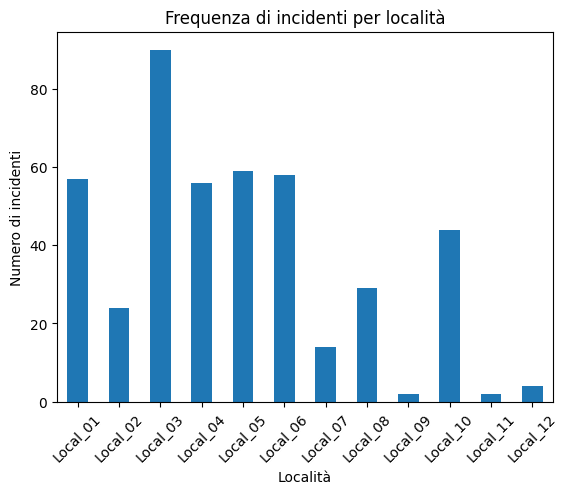

In [ ]:
# Si vuole calcolare la frequenza assoluta di incidenti per ogni località

# Si raggruppano i dati per località e si contano le occorrenze degli incidenti per ognuna di esse
incidenti_per_località = df.groupby('Local').size()
print(incidenti_per_località)

# Si crea un grafico a barre per la rappresentazione grafica dei dati ottenuti
incidenti_per_località.plot(kind='bar')
plt.title('Frequenza di incidenti per località')
plt.xlabel('Località')
plt.ylabel('Numero di incidenti')
plt.xticks(rotation=45)
plt.show()

Local
Local_01    1.473684
Local_02    1.541667
Local_03    1.600000
Local_04    1.946429
Local_05    1.169492
Local_06    1.448276
Local_07    1.714286
Local_08    1.689655
Local_09    2.000000
Local_10    1.318182
Local_11    2.000000
Local_12    1.000000
Name: Accident Level, dtype: float64


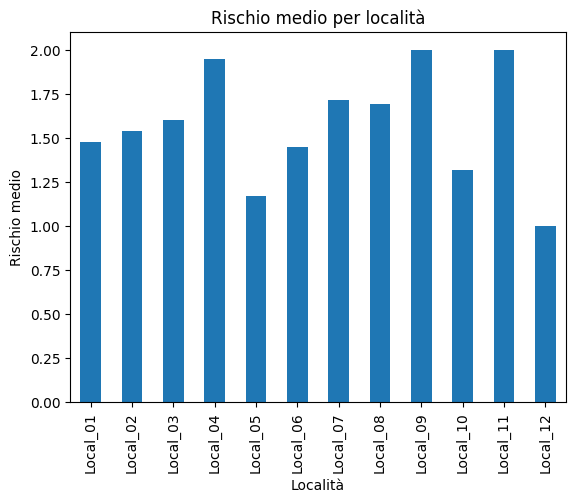

In [ ]:
# Si calcola la media del rischio per ogni paese
rischio_medio_per_paese = df.groupby('Local')['Accident Level'].mean()
print(rischio_medio_per_paese)

# Si realizza un grafico a barre per la rappresentazione grafica dei risultati ottenuti
rischio_medio_per_paese.plot(kind='bar')
plt.title('Rischio medio per località')
plt.xlabel('Località')
plt.ylabel('Rischio medio')
plt.show()

## **METRICHE STATISTICHE PER LA COLONNA INDUSTRY SECTOR**

Industry Sector
Mining    241
Metals    148
Others     50
Name: count, dtype: int64


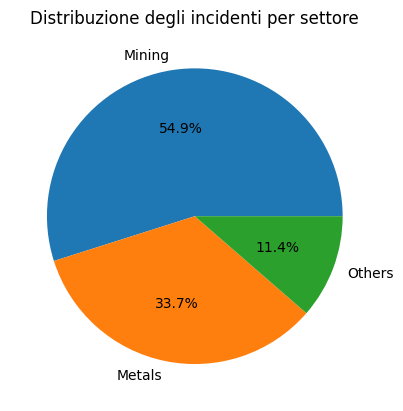

In [ ]:
# Si contano le occorrenze di incidenti in ogni settore
conteggi_incidenti = df['Industry Sector'].value_counts()
print(conteggi_incidenti)

# Si crea un grafico a torta per la rappresentazione delle occorrenze ottenute
plt.pie(conteggi_incidenti, labels=conteggi_incidenti.index, autopct='%1.1f%%')
plt.title('Distribuzione degli incidenti per settore')
plt.show()

In [ ]:
# Ora si vuole sapere il numero di occorrenze di incidenti di rischio effettivo 4 o 5 per ogni settore

# Si filtrano solo gli incidenti con rischio 4 e 5
incidenti_rischio_alto = df[(df['Accident Level'] == 4) | (df['Accident Level'] == 5)]

# Si contano le occorrenze per gli incidenti selezionati in ogni settore
incidenti_rischio_alto_2 = incidenti_rischio_alto.groupby('Industry Sector').size()
print(incidenti_rischio_alto_2)

print("Le percentuali di incidenti di ogni settore con rischio effettivo pari a 4,5 e 6 sono: ")
print(incidenti_rischio_alto_2/conteggi_incidenti)


Industry Sector
Metals    10
Mining    28
Others     2
dtype: int64
Le percentuali di incidenti di ogni settore con rischio effettivo pari a 4,5 e 6 sono: 
Industry Sector
Metals    0.067568
Mining    0.116183
Others    0.040000
dtype: float64


In [ ]:
# Ora si vuole sapere il numero di occorrenze di incidenti di rischio potenziale 4, 5 o 6 per ogni settore

# Si filtrano i dati per i rischi 4, 5 e 6
incidenti_rischio_alto = df[(df['Potential Accident Level'] == 4) | (df['Potential Accident Level'] == 5) | (df['Potential Accident Level'] == 6)]

# Si contano le occorrenze per gli incidenti selezionati in ogni settore
incidenti_per_settore_e_rischio_alto = incidenti_rischio_alto.groupby('Industry Sector').size()
print(incidenti_per_settore_e_rischio_alto)

print("Le percentuali di incidenti di ogni settore con rischio potenziale pari a 4,5 e 6 sono: ")
print(incidenti_per_settore_e_rischio_alto/conteggi_incidenti)



Industry Sector
Metals     49
Mining    131
Others      9
dtype: int64
Le percentuali di incidenti di ogni settore con rischio potenziale pari a 4,5 e 6 sono: 
Industry Sector
Metals    0.331081
Mining    0.543568
Others    0.180000
dtype: float64


## **METRICHE STATISTICHE PER LA COLONNA ACCIDENT LEVEL**

Accident Level
1    328
2     40
4     31
3     31
5      9
Name: count, dtype: int64


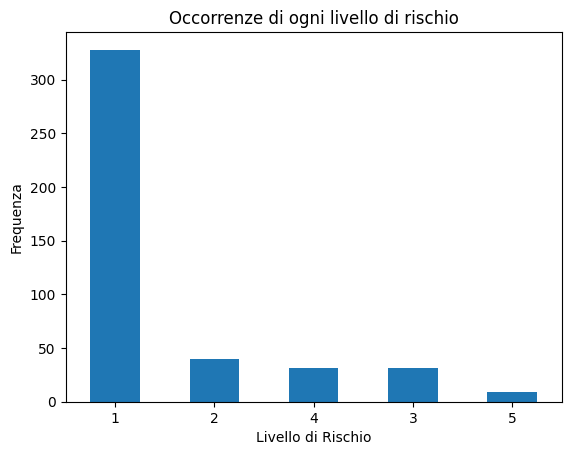

In [ ]:
# Si calcolano le frequenze di ogni livello di incidente

# Per ogni livello di rischio effettivo si contano le occorrenze
frequenza_livelli = df['Accident Level'].value_counts()
print(frequenza_livelli)

# Si realizza un grafico a barre per la rappresentazione grafica dei risultati ottenuti
frequenza_livelli.plot(kind='bar')
plt.xlabel('Livello di Rischio')
plt.ylabel('Frequenza')
plt.title('Occorrenze di ogni livello di rischio')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Si calcolano le frequenze relative di ogni livello di rischio effettivo e si stampano i risultati
frequenze_relative = df['Accident Level'].value_counts(normalize=True)
print(frequenze_relative)

Accident Level
1    0.747153
2    0.091116
4    0.070615
3    0.070615
5    0.020501
Name: proportion, dtype: float64


La media del livello degli incidenti è: 1.5261958997722096
0     -0.526196
1     -0.526196
2     -0.526196
3     -0.526196
4      2.473804
         ...   
434   -0.526196
435   -0.526196
436   -0.526196
437   -0.526196
438   -0.526196
Name: Accident Level, Length: 439, dtype: float64


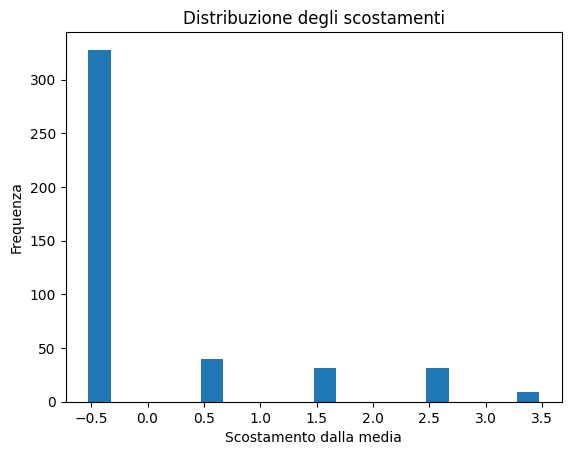

In [ ]:
# Si vuole calcolare la media e lo scostamento da essa per la colonna di rischio

# Si calcola la media
media_accident_level = df['Accident Level'].mean()
print("La media del livello degli incidenti è:", media_accident_level)

# Si calcola lo scostamento di ogni valore dalla media
scostamenti = df['Accident Level'] - media_accident_level
print(scostamenti)

# Si crea l'istogramma per visualizzare graficamenti i risultati ottenuti per gli scostamenti
plt.hist(scostamenti, bins=20)
plt.xlabel('Scostamento dalla media')
plt.ylabel('Frequenza')
plt.title('Distribuzione degli scostamenti')
plt.show()

Il massimo scostamento è: 4


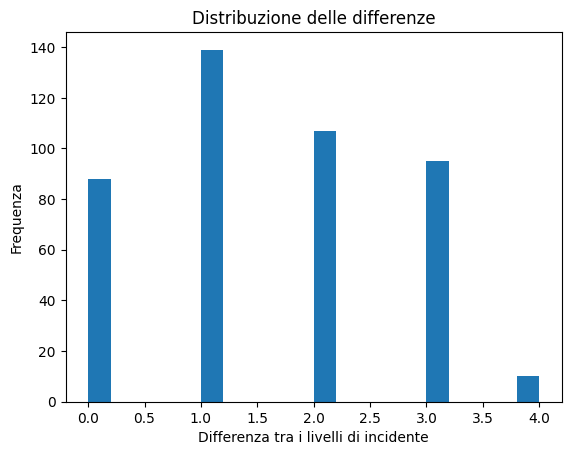

Ci sono 10 righe con lo scostamento massimo.
un esempio di riga con massimo scostamento:
Data                        2016-02-24 00:00:00
Countries                            Country_02
Local                                  Local_07
Industry Sector                          Mining
Accident Level                                1
Potential Accident Level                      5
Genre                                      Male
Employee ou Terceiro                   Employee
Risco Critico                            Others
Name: 37, dtype: object


In [ ]:
# Si calcola la differenza assoluta tra la colonna di rischio effettivo e rischio potenziale
differenze = abs(df['Accident Level'] - df['Potential Accident Level'])

# Si trova il massimo scostamento
massimo_scostamento = differenze.max()
print("Il massimo scostamento è:", massimo_scostamento)

# Tramite un istogramma si rappresenta graficamente la distribuzione delle differenze tra effettivo e potenziale
plt.hist(differenze, bins=20)
plt.xlabel('Differenza tra i livelli di incidente')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle differenze')
plt.show()

# Si calcola il numero di righe che presentano lo scostamento massimo
num_righe_max_scostamento = (
    abs(df['Accident Level'] - df['Potential Accident Level']) ==
    abs(df['Accident Level'] - df['Potential Accident Level']).max()
).sum()
print("Ci sono", num_righe_max_scostamento, "righe con lo scostamento massimo.")

# Si stampa una riga, del dataset, come esempio, che ha scostamento massimo tra i valori di rischio potenziale ed effettivo
print("un esempio di riga con massimo scostamento:")

indice_max_scostamento = abs(df['Accident Level'] - df['Potential Accident Level']).idxmax()
riga_max_scostamento = df.loc[indice_max_scostamento]

print(riga_max_scostamento)


## **METRICHE STATISTICHE PER LA COLONNA POTENTIAL ACCIDENT LEVEL**

La media del livello di potenziale incidente è: 3.070615034168565
Lo scostamento tra le medie di rischio teorico e rischio effettivo è: 1.5444191343963554
La mediana del livello di potenziale incidente è: 3.0
La moda del livello di potenziale incidente è: 4
La deviazione standard del livello di potenziale incidente è: 1.1555019604858754
La varianza della colonna 'Potential Accident Level' è: 1.3351847806867014
Il range della colonna 'Potential Accident Level' è: 5
Lo scostamento tra le medie del rischio teorico e potenziale è: 1.5444191343963554
I percentili del rischio teorico sono:
0.25    2.0
0.50    3.0
0.75    4.0
Name: Potential Accident Level, dtype: float64


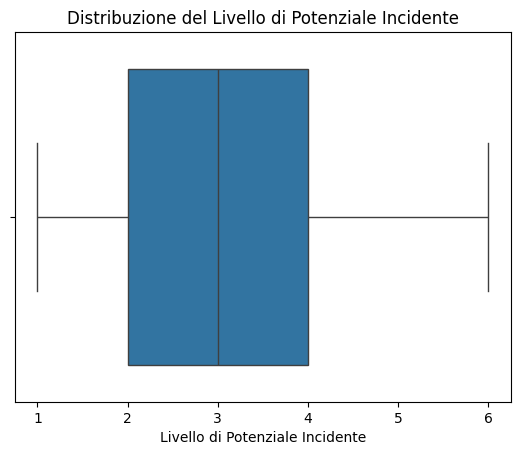

In [ ]:
# Si vogliono calcolare una serie di metriche statistiche descrittive per la colonna di rischio potenziale

# Si calcola la media e si stampa
media_potenziale_incidente= df['Potential Accident Level'].mean()
print("La media del livello di potenziale incidente è:", media_potenziale_incidente)

# Si calcola lo scostamento tra le medie di rischio teorico e rischio effettivo e si stampa
scostamento = abs(media_potenziale_incidente - media_accident_level)
print("Lo scostamento tra le medie di rischio teorico e rischio effettivo è:", scostamento)

# Si calcola la mediana e si stampa
mediana_potenziale_incidente = df['Potential Accident Level'].median()
print("La mediana del livello di potenziale incidente è:", mediana_potenziale_incidente)

# Si calcola la moda e si stampa
moda_potenziale_incidente = df['Potential Accident Level'].mode()[0]
print("La moda del livello di potenziale incidente è:", moda_potenziale_incidente)

# Si calcola la deviazione standard e si stampa
deviazione_standard = df['Potential Accident Level'].std()
print("La deviazione standard del livello di potenziale incidente è:", deviazione_standard)

# Si calcola la varianza e si stampa
varianza = df['Potential Accident Level'].var()
print("La varianza della colonna 'Potential Accident Level' è:", varianza)

# Si calcola il valore massimo della colonna
valore_massimo = df['Potential Accident Level'].max()

# Si calcola il valore minimo della colonna
valore_minimo = df['Potential Accident Level'].min()

# Si calcola il range di valori entro cui ricade il rischio potenziale
range = valore_massimo - valore_minimo
print("Il range della colonna 'Potential Accident Level' è:", range)

# Si calcolano i percentili (esempio: 25°, 50° e 75°)
percentili = df['Potential Accident Level'].quantile([0.25, 0.5, 0.75])
print("I percentili del rischio teorico sono:")
print(percentili)

# Si crea il box plot, per rappresentare i percentili trovati
sns.boxplot(x='Potential Accident Level', data=df)
plt.title('Distribuzione del Livello di Potenziale Incidente')
plt.xlabel('Livello di Potenziale Incidente')
plt.show()


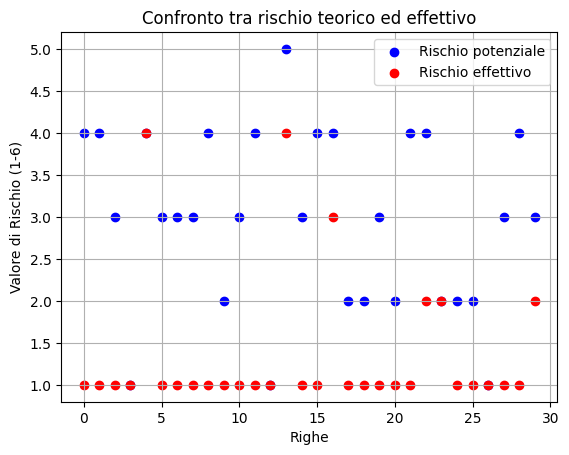

In [ ]:
# Tramite un grafico di tipo ScatterPlot (grafico a dispersione) si vogliono sottolineare le differenze tra il valore di rischio potenziale ed effettivo

# Si selezionano le prime 30 righe
data = df.head(30)

# Si crea il grafico a punti
plt.scatter(data.index, data['Potential Accident Level'], color='blue', label='Rischio potenziale')
plt.scatter(data.index, data['Accident Level'], color='red', label='Rischio effettivo')
plt.xlabel('Righe')
plt.ylabel('Valore di Rischio (1-6)')
plt.title('Confronto tra rischio teorico ed effettivo')
plt.legend()
plt.grid(True) # si attiva la griglia per una visualizzazione più chiara
plt.show()

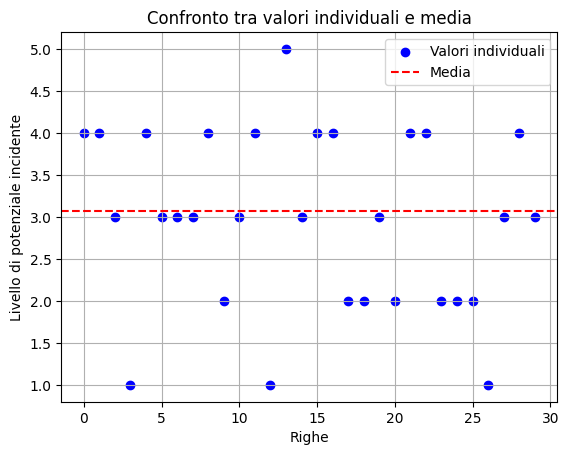

In [ ]:
# Tramite un grafico di tipo ScatterPlot si vuole sottolineare la differenza tra il valore di rischio potenziale e il valore medio trovato

# Si selezionano le prime 30 righe, come esempio
data = df.head(30)

# Si crea un grafico a punti
plt.scatter(data.index, data['Potential Accident Level'], color='blue', label='Valori individuali')
plt.axhline(y=media_potenziale_incidente, color='red', linestyle='--', label='Media')
plt.xlabel('Righe')
plt.ylabel('Livello di potenziale incidente')
plt.title('Confronto tra valori individuali e media')
plt.legend()
plt.grid(True)
plt.show()

## **METRICHE STATISTICHE PER LA COLONNA GENRE**

Il numero di incidenti per genere è:
Genre
Male      417
Female     22
Name: count, dtype: int64


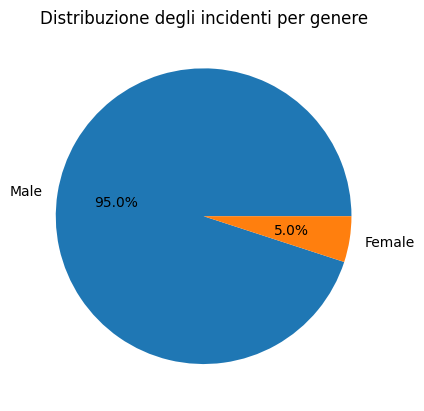

In [ ]:
# Si contano il numero di occorrenze di incidenti per ogni genere
numero_genere = df['Genre'].value_counts()
print("Il numero di incidenti per genere è:")
print(numero_genere)

# Si crea un grafico a torta per la rappresentazione grafica dei risultati
plt.pie(numero_genere, labels=numero_genere.index, autopct='%1.1f%%')
plt.title('Distribuzione degli incidenti per genere')
plt.show()


Genre            Female  Male
Industry Sector              
Metals               13   135
Mining                5   236
Others                4    46


<Figure size 800x600 with 0 Axes>

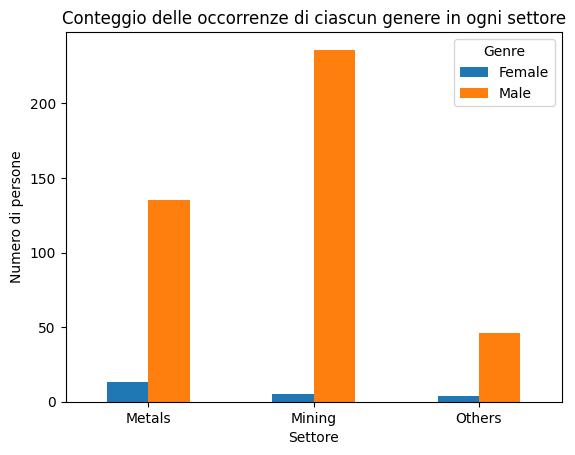

In [7]:
# Si vuole contare il numero di occorrenze di incidenti di uno specifico genere per ogni settore industriale
conteggio_genere_per_settore = df.groupby(['Industry Sector', 'Genre']).size().unstack(fill_value=0)
print(conteggio_genere_per_settore)

# Si crea un grafico a barre raggruppate per la rappresentazione del risultato ottenuto
plt.figure(figsize=(8, 6))
conteggio_genere_per_settore.plot(kind='bar', stacked=False)
plt.title("Conteggio delle occorrenze di ciascun genere in ogni settore")
plt.xlabel("Settore")
plt.ylabel("Numero di persone")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Si calcola la media del rischio effettivo per genere e si stampa il risultato
media_rischio_per_genere = df.groupby('Genre')['Accident Level'].mean()
print(media_rischio_per_genere)


Genre
Female    1.227273
Male      1.541966
Name: Accident Level, dtype: float64


## **METRICHE STATISTICHE PER LA COLONNA EMPLOYEE OU TERCEIRO**

Employee ou Terceiro
Third Party             189
Employee                181
Third Party (Remote)     69
Name: count, dtype: int64


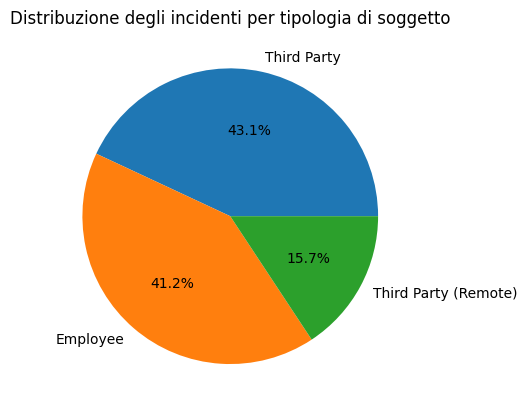

In [ ]:
# Si contano le occorrenze di ciascun incidente per tipo di soggetto coinvolto
conteggi_incidenti = df['Employee ou Terceiro'].value_counts()
print(conteggi_incidenti)

# Si crea il grafico a torta per la rappresentazione grafica
plt.pie(conteggi_incidenti, labels=conteggi_incidenti.index, autopct='%1.1f%%')
plt.title('Distribuzione degli incidenti per tipologia di soggetto')
plt.show()

Genre                 Female  Male
Employee ou Terceiro              
Employee                   8   173
Third Party                9   180
Third Party (Remote)       5    64
Il livello di rischio medio per gli impiegati remoti è: 1.463768115942029


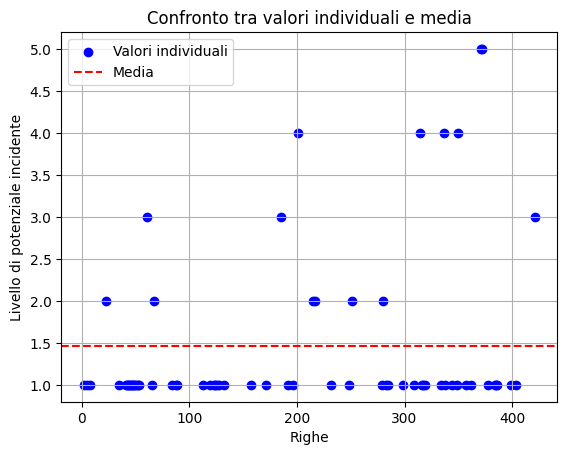

In [ ]:
# Si contano le occorrenze raggruppando gli incidenti in base alla tipologia di soggetto coinvolto e il suo genere
conteggio_genere_per_tipo_impiegato = df.groupby(['Employee ou Terceiro', 'Genre']).size().unstack(fill_value=0)
print(conteggio_genere_per_tipo_impiegato)

# Si filtrano i dati per i soggetti da remoto
impiegati_remoti = df[df['Employee ou Terceiro'] == 'Third Party (Remote)']

# Si calcola la media del livello di rischio per i soggetti da remoto
media_rischio_remoti = impiegati_remoti['Accident Level'].mean()
print("Il livello di rischio medio per gli impiegati da remoto è:", media_rischio_remoti)

data= df[df['Employee ou Terceiro'] == 'Third Party (Remote)']

# Si crea un grafico a punti per visualizzare lo scostamento dalla media
plt.scatter(data.index, data['Accident Level'], color='blue', label='Valori individuali')
plt.axhline(y=media_rischio_remoti, color='red', linestyle='--', label='Media')
plt.xlabel('Righe')
plt.ylabel('Livello di potenziale incidente')
plt.title('Confronto tra valori individuali e media')
plt.legend()
plt.grid(True)
plt.show()

## **METRICHE STATISTICHE PER LA COLONNA RISCO CRITICO**

In [ ]:
# Si raggruppano per tipo di incidente in ogni settore industriale
conteggio_tipologia_per_settore = df.groupby(['Industry Sector', 'Risco Critico']).size().unstack(fill_value=0)
print(conteggio_tipologia_per_settore)


Risco Critico    \nNot applicable  Bees  Blocking and isolation of energies  \
Industry Sector                                                               
Metals                          1     0                                   3   
Mining                          0     0                                   0   
Others                          0    10                                   0   

Risco Critico    Burn  Chemical substances  Confined space  Cut  \
Industry Sector                                                   
Metals              1                   15               1   10   
Mining              0                    2               0    4   
Others              0                    0               0    0   

Risco Critico    Electrical Shock  Electrical installation  Fall  ...  \
Industry Sector                                                   ...   
Metals                          0                        0     2  ...   
Mining                          2                

Industry Sector                              Metals    Mining    Others
Risco Critico                                                          
\nNot applicable                           1.000000  0.000000  0.000000
Bees                                       0.000000  0.000000  1.000000
Blocking and isolation of energies         1.000000  0.000000  0.000000
Burn                                       1.000000  0.000000  0.000000
Chemical substances                        0.882353  0.117647  0.000000
Confined space                             1.000000  0.000000  0.000000
Cut                                        0.714286  0.285714  0.000000
Electrical Shock                           0.000000  1.000000  0.000000
Electrical installation                    0.000000  1.000000  0.000000
Fall                                       0.222222  0.555556  0.222222
Fall prevention                            0.500000  0.333333  0.166667
Fall prevention (same level)               0.857143  0.142857  0

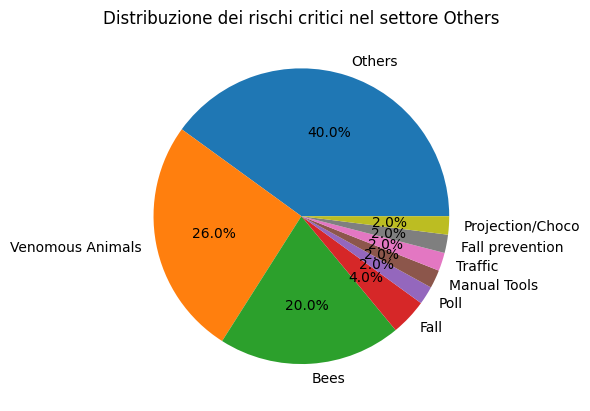

In [ ]:
# Si crea una tabella di contingenza per contare le occorrenze di rischi critici per settore
contingency_table = pd.crosstab(df['Risco Critico'], df['Industry Sector'])

# Si calcolano le percentuali di rischi critici per ogni settore industriale
percentuali_rischi = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(percentuali_rischi)

# Si seleziona uno specifico settore di interesse (es. 'Others')
settore = 'Others'
df_settore = df[df['Industry Sector'] == settore]

# Si contano le occorrenze dei rischi per il settore selezionato
conteggi = df_settore['Risco Critico'].value_counts()

# Si calcolano le percentuali
percentuali = conteggi / conteggi.sum() * 100

# Si crea un grafico a torta
plt.pie(percentuali, labels=percentuali.index, autopct='%1.1f%%')
plt.title(f'Distribuzione dei rischi critici nel settore {settore}')
plt.show()

In [ ]:
# Si vogliono vedere nello specifico gli incidenti causati da api

# Si filtrano i dati dove "Risco Critico" è uguale a "Bees" e si stampano le date dei risultati
rischi_api = df[df['Risco Critico'] == 'Bees']
print(rischi_api['Data'])



141    2016-05-25 00:00:00
142    2016-05-26 00:00:00
155    2016-06-08 00:00:00
160    2016-06-16 00:00:00
161    2016-06-16 00:00:00
162    2016-06-16 00:00:00
163    2016-06-16 00:00:00
164    2016-06-18 00:00:00
165    2016-06-18 00:00:00
198    2016-08-02 00:00:00
Name: Data, dtype: object
